# Linear regression with one variable

In [42]:
import sys
print(sys.version)
print('\n'.join(sys.path)) # does this show the files and folders you need?

3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

/home/johan/anaconda2/envs/tensorflow_py3/lib/python35.zip
/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5
/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5/plat-linux
/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5/lib-dynload
/home/johan/.local/lib/python3.5/site-packages
/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5/site-packages
/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5/site-packages/torchvision-0.2.1-py3.5.egg
/home/johan/.local/lib/python3.5/site-packages/IPython/extensions
/home/johan/.ipython


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

In [44]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

def warmUpExercise():
    a = np.identity(5)
    return(a)
    
print('warmUpExercise:\n', warmUpExercise())

warmUpExercise:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


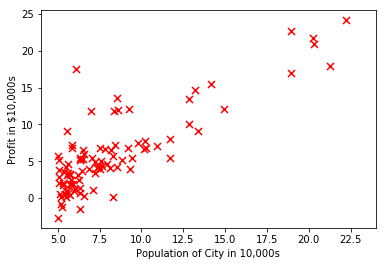

In [45]:
data = np.loadtxt('1.Programming Assignment: Linear Regression/ex1/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

plt.scatter(X[:,1], y, s=50, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');


#The objective of linear regression is to minimize the cost function:

$${J(\theta) = {\frac{1}{2m}}{\sum\limits_{i=1}^m}(h_{\theta}(x^{(i)}-y^{(i)})^2)}$$

where the hypothesis $$\large {h_\theta(x)}$$ is given by the linear model

$$\large {h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1}$$



In [46]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

print('computeCost:', round(computeCost(X,y),2))


computeCost: 32.07


Now we have to adjust the valuesof theta to minimize cost J(θ). One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update.


$${\theta_j := \theta_j - \alpha {\frac{1}{2m}}{\sum\limits_{i=1}^m}(h_{\theta}(x^{(i)}-y^{(i)})^2)}$$


With each step of gradient descent, the parameters of theta come closer to the optimal values that will achieve the lowest cost J(θ)


theta:  [-3.63029144  1.16636235]


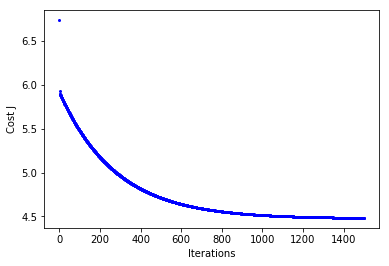

In [47]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y)

print('theta: ',theta.ravel())

plt.plot(Cost_J,'bo',markersize= 2)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

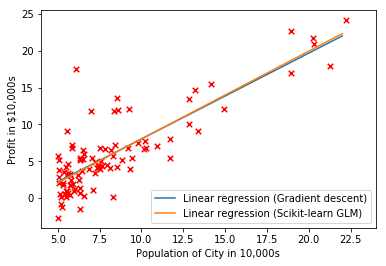

In [48]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [49]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


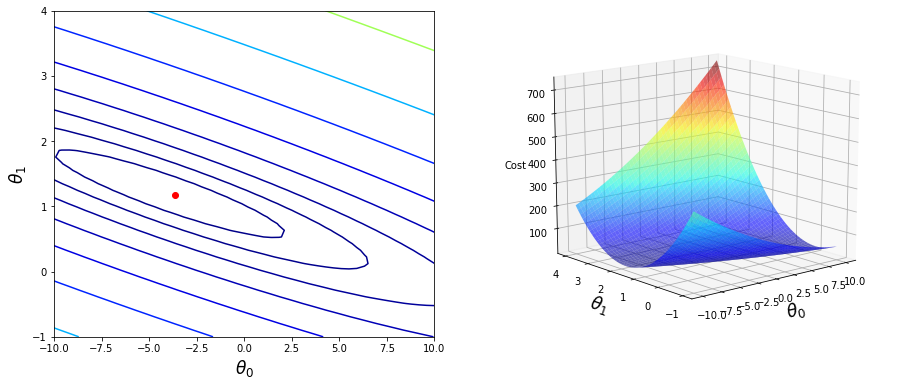

In [50]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)


In [51]:
#from numpy.linalg import pinv
def normal_eq(X, y):
    a = np.linalg.inv(X.T.dot(X))
    b = a.dot(X.T)
    c = b.dot(y)
    return theta

theta = normal_eq(X, y)
cost = computeCost(X, y, theta)

In [52]:
print('theta:', theta.ravel())
print('cost:', cost)

print('Predict profit for a city with population of 35000 (using normal equations):')
price_2 = theta.T.dot([1, 3.5])*10000
print('Price:', price_2)

print('Predict profit for a city with population of 70000 (using normal equations):')
price_2 = theta.T.dot([1, 7])*10000
print('Price:', price_2)

theta: [-3.63029144  1.16636235]
cost: 4.483388256587725
Predict profit for a city with population of 35000 (using normal equations):
Price: [4519.7678677]
Predict profit for a city with population of 70000 (using normal equations):
Price: [45342.45012945]


# Linear regression with multiple variables

In [53]:
import numpy as np
import pandas as pd

data = pd.read_csv('1.Programming Assignment: Linear Regression/ex1/ex1data2.txt', sep = ',', header = None)
X = data.iloc[:,0:2] # read first two columns into X
X_raw = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples
data.head()

      0  1       2
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900

When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge
much more quickly.



The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min).


$$\large {x_i := {\frac{x_i - u_i}{s_i}}\quad or\quad x_i := {\frac{x_i - u_i}{max -min}}} $$

In [54]:
#Feature Normalization
mu = np.mean(X)
sigma = np.std(X)
X = (X - mu)/sigma
#Adding the intercept term and initializing parameters
ones = np.ones((m,1))
X = np.hstack((ones, X))
X_raw = np.hstack((ones, X_raw))# For plotting the ex1data2's raw information.
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1))
y = y[:,np.newaxis]

A.Clearly we need feature normalization.
B.Feature Normalization Accomplished.


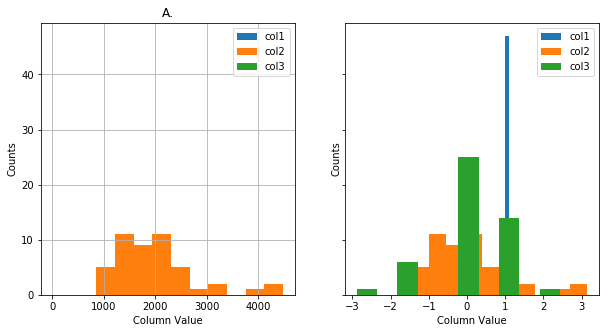

In [55]:
print ('A.Clearly we need feature normalization.')
print ('B.Feature Normalization Accomplished.')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))

#Quick visualize data
ax1.grid(True)
dummy = ax1.hist(X_raw[:,0],label = 'col1')
dummy = ax1.hist(X_raw[:,1],label = 'col2')
dummy = ax1.hist(X_raw[:,2],label = 'col3')
dummy = ax1.legend()
ax1.set_title('A.')
ax1.set_xlabel('Column Value')
ax1.set_ylabel('Counts')

dummy = ax2.hist(X[:,0],label = 'col1')
dummy = ax2.hist(X[:,1],label = 'col2')
dummy = ax2.hist(X[:,2],label = 'col3')
dummy = plt.legend()
ax2.set_xlabel('Column Value')
ax2.set_ylabel('Counts')

In [56]:
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCostMulti(X, y, theta)
print(J)

65591548106.45744


In [57]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [58]:
J = computeCostMulti(X, y, theta)
print(J)

2105448288.6292474


In [59]:
temp = [1,1650,3];
temp[1:3] = (temp[1:3] - mu)/sigma
print(temp)
price = theta.T.dot(temp);
print('Price:', price)

[1, -0.4460438603276164, -0.22609336757768828]
Price: [289221.54737122]


In [60]:
from numpy.linalg import inv

def normal_eq(X, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

theta = normal_eq(X_raw, y)
cost = computeCostMulti(X_raw, y, theta)

In [61]:
print('theta:', theta.ravel())
print('cost:', cost)

temp = [1,1650,3];
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):')
price_2 = theta.T.dot(temp);
print('Price:', price_2)

theta: [89597.9095428    139.21067402 -8738.01911233]
cost: 2043280050.6028287
Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
Price: [293081.4643349]
